[View in Colaboratory](https://colab.research.google.com/github/AlbertZheng/deep-learning-lab/blob/master/tensorlayer/notebooks/tutorial_mnist_simple.ipynb)

## **检测colab runtime是否有GPU可用？**

In [2]:
!pip install "tensorlayer>=1.9"

import tensorflow as tf
import tensorlayer as tl


# Confirm TensorFlow can see the GPU on Colaboratory
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('### Found GPU at: {} ###'.format(device_name))


    100% |████████████████████████████████| 317kB 16.6MB/s 
    100% |████████████████████████████████| 5.8MB 6.6MB/s 
    100% |████████████████████████████████| 25.3MB 1.6MB/s 
    100% |████████████████████████████████| 3.3MB 977kB/s 
    100% |████████████████████████████████| 92kB 24.4MB/s 
    100% |████████████████████████████████| 12.6MB 2.9MB/s 
    100% |████████████████████████████████| 31.2MB 1.5MB/s 
    100% |████████████████████████████████| 51kB 20.5MB/s 
    100% |████████████████████████████████| 665kB 23.7MB/s 
    100% |████████████████████████████████| 2.0MB 16.3MB/s 
    100% |████████████████████████████████| 952kB 1.2MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1
  Found existing installatio

## **加载数据集**

[TL] Load or Download MNIST > data/mnist
[TL] Downloading train-images-idx3-ubyte.gz...



100% (1211 of 1211) |####################| Elapsed Time: 0:00:03 ETA:  00:00:00

[TL] Succesfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
[TL] data/mnist/train-images-idx3-ubyte.gz
[TL] Downloading train-labels-idx1-ubyte.gz...



100% (4 of 4) |##########################| Elapsed Time: 0:00:00 ETA:  00:00:00

[TL] Succesfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
[TL] Downloading t10k-images-idx3-ubyte.gz...



100% (202 of 202) |######################| Elapsed Time: 0:00:01 ETA:  00:00:00

[TL] Succesfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
[TL] data/mnist/t10k-images-idx3-ubyte.gz
[TL] Downloading t10k-labels-idx1-ubyte.gz...



100% (1 of 1) |##########################| Elapsed Time: 0:00:00 ETA:  00:00:00

[TL] Succesfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
(50000, 784) (50000,)


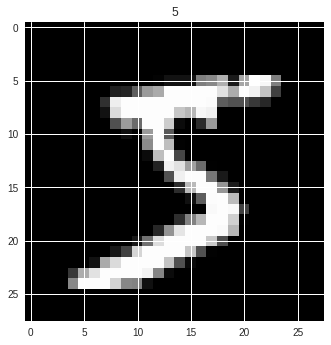

In [3]:
#########################################################################
# Testing matrix multiply using GPU
#########################################################################
#sess = tf.InteractiveSession()

#a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#c = tf.matmul(a, b)
# Runs the op.
#print(sess.run(c))

#sess.close()
#########################################################################


tf.logging.set_verbosity(tf.logging.DEBUG)
tl.logging.set_verbosity(tl.logging.DEBUG)

#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
sess = tf.InteractiveSession()

# prepare data
X_train, y_train, X_val, y_val, X_test, y_test = tl.files.load_mnist_dataset(shape=(-1, 784))

print(X_train.shape, y_train.shape)

import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28),cmap='gray')
plt.title(y_train[0])
plt.show()


## **构建网络模型，然后对模型进行训练、校验和测试**

In [4]:
# define placeholder
x = tf.placeholder(tf.float32, shape=[None, 784], name='x')
y_ = tf.placeholder(tf.int64, shape=[None], name='y_')

# define the network
network = tl.layers.InputLayer(x, name='input')
network = tl.layers.DropoutLayer(network, keep=0.8, name='drop1')
network = tl.layers.DenseLayer(network, 800, tf.nn.relu, name='relu1')
network = tl.layers.DropoutLayer(network, keep=0.5, name='drop2')
network = tl.layers.DenseLayer(network, 800, tf.nn.relu, name='relu2')
network = tl.layers.DropoutLayer(network, keep=0.5, name='drop3')
# the softmax is implemented internally in tl.cost.cross_entropy(y, y_) to
# speed up computation, so we use identity here.
# see tf.nn.sparse_softmax_cross_entropy_with_logits()
network = tl.layers.DenseLayer(network, n_units=10, act=None, name='output')

# define cost function and metric.
y = network.outputs
cost = tl.cost.cross_entropy(y, y_, name='cost')
correct_prediction = tf.equal(tf.argmax(y, 1), y_)
acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
y_op = tf.argmax(tf.nn.softmax(y), 1)

# define the optimizer
train_params = network.all_params
train_op = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost, var_list=train_params)

# initialize all variables in the session
tl.layers.initialize_global_variables(sess)

# print network information
network.print_params()
network.print_layers()

# train the network
tl.utils.fit(sess, network, train_op, cost, X_train, y_train, x, y_, acc=acc, batch_size=500, \
    n_epoch=500, print_freq=5, X_val=X_val, y_val=y_val, eval_train=False)

# evaluation
tl.utils.test(sess, network, acc, X_test, y_test, x, y_, batch_size=None, cost=cost)

# save the network to .npz file
tl.files.save_npz(network.all_params, name='model.npz')

sess.close()


[TL] InputLayer  input: (?, 784)
[TL] DropoutLayer drop1: keep: 0.800000 is_fix: False
[TL] DenseLayer  relu1: 800 relu
[TL] DropoutLayer drop2: keep: 0.500000 is_fix: False
[TL] DenseLayer  relu2: 800 relu
[TL] DropoutLayer drop3: keep: 0.500000 is_fix: False
[TL] DenseLayer  output: 10 No Activation
[TL] WARNING: Function: `tensorlayer.layers.utils.initialize_global_variables` (in file: /usr/local/lib/python3.6/dist-packages/tensorlayer/layers/utils.py) is deprecated and will be removed after 2018-09-30.
Instructions for updating: This API is deprecated in favor of `tf.global_variables_initializer`

[TL]   param   0: relu1/W:0            (784, 800)         float32_ref (mean: 6.204535748111084e-05, median: 4.676779644796625e-05, std: 0.08797505497932434)   
[TL]   param   1: relu1/b:0            (800,)             float32_ref (mean: 0.0               , median: 0.0               , std: 0.0               )   
[TL]   param   2: relu2/W:0            (800, 800)         float32_ref (mean: 0